## TP3 : Logistic regression

The purpose of this tutorial is to implement and use the Logistic Regression for binary classification. We will apply this
method to the problem of handwritten characters to learn how to
distinguish two numbers (here 5 and 6).


In [1]:
from pylab import *
#import numpy as np
#import matplotlib.pyplot as plt
import  seaborn as sns 
import pandas as pd
from numpy import random
from numpy import linalg as la

## 1. Logistic regression, IRLS algorithm.

### Preliminary question: the algorithm

#### Have a look at the function `regression_logistique.m` and locate the main steps of the algorithm you have been taught (see course).
You can comment the code in the cell below.

In [2]:
def regression_logistique(X,t,Nitermax=20,eps_conv=1e-3):
    '''Entrees :
    X = [ones(N_train,1) x_train];
    t = class_train 
    Nitermax = nombre maximale d'itérations (20 par défaut)
    eps_conv = critère de convergence sur norm(w-w_old)/norm(w) ; 
    eps_conv=1e-3 par défaut
    
    Sorties : 
    w : vecteur des coefficients de régression logistique
   Niter : nombre d'itérations utilisées effectivement
   
   Fonction de régression logistique pour la classification binaire.
   
   Utilisation :
       Nitermax = 50
       eps_conv = 1e-4
       [w,Niter] = regression_logistique(X,t,Nitermax,eps_conv)
    '''
    N_train = X.shape[0]

    #initialisation : 1 pas de l'algorithme IRLS
    w = np.zeros((X.shape[1],))
    w_old = w 
    y = 1/2*np.ones((N_train,))
    R = np.diag(y*(1-y))   # diag(y_n(1-y_n))
    z = X.dot(w_old)-la.inv(R).dot(y-t)
    w = la.inv(X.T.dot(R).dot(X)).dot(X.T).dot(R).dot(z)

    # boucle appliquant l'algorithme de Newton-Raphson
    Niter = 1
    while ( (la.norm(w-w_old)/la.norm(w)>eps_conv) & (Niter<Nitermax) ):
        Niter = Niter+1
        y = 1/(1+np.exp(-X.dot(w)))
        R = np.diag(y*(1-y))  
        w_old = w 
        z = X.dot(w_old)-la.inv(R).dot(y-t) 
        w = la.inv(X.T.dot(R).dot(X)).dot(X.T).dot(R).dot(z)
         
    return w, Niter


### Reading & preparing synthetic data

Load the training and test data sets `synth_train.txt`
and `synth_test.txt`. The targets t belong to {1,2} and the features  
x belong to R^2. 

We have 100 training samples and 200 test samples

* the 1st column contains the label of each sample, 
* columns 2 and 3 contain the coordinate of each point.

In [3]:
# Training set
synth_train = np.loadtxt('synth_train.txt') 
class_train = synth_train[:,0]
class_train_1 = np.where(synth_train[:,0]==1)[0]
class_train_2 = np.where(synth_train[:,0]==2)[0]
x_train = synth_train[:,1:]
N_train = np.size(x_train,axis=0)

print(class_train_1)
# Test set
synth_test = np.loadtxt('synth_test.txt')
class_test = synth_test[:,0]
class_test_1 = np.where(synth_test[:,0]==1)[0]
class_test_2 = np.where(synth_test[:,0]==2)[0]
x_test = synth_test[:,1:]
N_test = np.size(x_test,axis=0)


[ 4  7 14 31 32 34 46 52 55 57 65 68 69 80 81 83 94 95 96 97 98 99]


### Preparing features for logistic regression (binary classification)
First, we prepare the feature matrix and the target vector associated to 
the training and test sets:


In [4]:
X = np.hstack((np.ones((N_train,1)),x_train))
t = 2-class_train   # 0 if class=2, 1 if class=1

X_test = np.hstack((np.ones((N_test,1)),x_test))
t_test = 2-class_test   # 0 if class=2, 1 if class=1

### Exercise 1 : the logistic function of decision

1. Use the function `regression_logistique.m` to estimate the logistic
regression vector `w`. *Indication : use `Nitermax = 50;
eps_conv=1e-3;`.*
2. Compute the decision function $f(x) = argmax_k P(C_k|x)$ on the test set
to get the classification results. Recall that $y_n=\sigma(w^T x)$ (logistic function)
and that *using vectors* you may directly write $y=\sigma(Xw)$, with the
column of ones in X.
3. Display the results by plotting the points from both the training set
and the test set.
4. Write the equation which defines the decision boundary.
5. Artificially add a few points to the training set far from the decision boundary to check the robustness of logistic regression to outliers. Check the behaviour of LDA for comparison in this case and comment. 


In [5]:
#Exercise 1
w, Niter = regression_logistique(X, t,Nitermax=50,eps_conv=1e-3)

#Train set
y = 1/(1+np.exp(-X.dot(w)))
y_train_pred = np.where(y > 0.5, 1, 0)





#Test set 
y = 1/(1+np.exp(-X_test.dot(w)))
y_test_pred = np.where(y > 0.5, 1, 0)

#...

In [6]:
# Result Train set
TP = np.where(y_train_pred + t == 2, 1, 0).sum()
TN = np.where(y_train_pred + t == 0, 1, 0).sum()
FP = np.where(y_train_pred - t == 1, 1, 0).sum()
FN = np.where(y_train_pred - t == -1, 1, 0).sum()

pred_correct = TP + TN
pred_false = N_train - pred_correct
accuracy = pred_correct / N_train
precision = TP / (TP + FN)
recall  = TP / (TP + FP)
print(f"TP : {TP}, TN : {TN}, FP : {FP}, FN : {FN}, accuracy : {accuracy}, precision : {precision}, recall : {recall}")

TP : 20, TN : 77, FP : 1, FN : 2, accuracy : 0.97, precision : 0.9090909090909091, recall : 0.9523809523809523


In [7]:
TP = np.where(y_test_pred + t_test == 2, 1, 0).sum()
TN = np.where(y_test_pred + t_test == 0, 1, 0).sum()
FP = np.where(y_test_pred - t_test == 1, 1, 0).sum()
FN = np.where(y_test_pred - t_test == -1, 1, 0).sum()

pred_correct = TP + TN
pred_false = N_test - pred_correct
accuracy = pred_correct / N_test
precision = TP / (TP + FN)
recall  = TP / (TP + FP)
print(f"TP : {TP}, TN : {TN}, FP : {FP}, FN : {FN}, accuracy : {accuracy}, precision : {precision}, recall : {recall}")

TP : 52, TN : 136, FP : 2, FN : 10, accuracy : 0.94, precision : 0.8387096774193549, recall : 0.9629629629629629


You can draw the decision boundary $w^Tx = 0$ by using: 


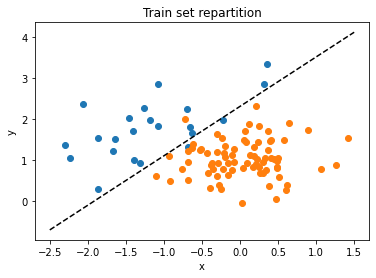

In [8]:
# First compute w... then: 
x1 = np.linspace(-2.5,1.5,10) 
x2 = (-w[0]-w[1]*x1)/w[2]
plt.plot(x1,x2,'k--')

# Plot the data

plt.scatter(x_train[class_train_1][:,0], x_train[class_train_1][:,1])

plt.scatter(x_train[class_train_2][:,0], x_train[class_train_2][:,1])

plt.title("Train set repartition")
plt.xlabel("x")
plt.ylabel("y")


plt.show()
# ...

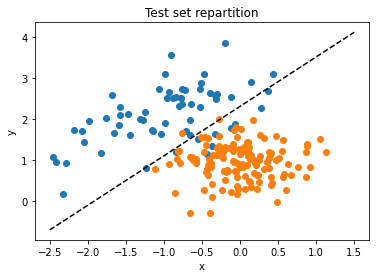

In [9]:
plt.plot(x1,x2,'k--')


plt.scatter(x_test[class_test_1][:,0], x_test[class_test_1][:,1])

plt.scatter(x_test[class_test_2][:,0], x_test[class_test_2][:,1])

plt.title("Test set repartition")
plt.xlabel("x")
plt.ylabel("y")

plt.show()

## 2. Application: handwritten digits recognition 5 & 6
We load 2 matrices which contain each a sequence of examples of 16x16 images 
of handwritten digits which are 5 and 6 here. Each line of the matrix
contains 256 pixel values coding for the gray level of a 16x16 image.

In [10]:
train_5 = np.loadtxt('train_5.txt',delimiter=',')   # 556 samples
train_6 = np.loadtxt('train_6.txt',delimiter=',')   # 664 samples

In [11]:
N_5 = train_5.shape[0]
N_6 = train_6.shape[0]


### Examples of images


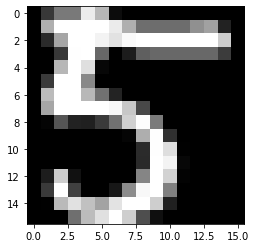

In [12]:
# Digit 5
n=9;
I = np.reshape(train_5[n,:],(16,16))

plt.imshow(I,cmap='gray')
plt.show()

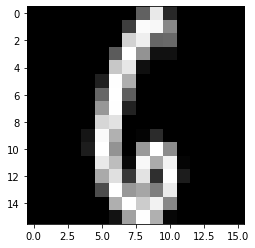

In [13]:
# Digit 6
n=5;
I = reshape(train_6[n,:],(16,16))

plt.imshow(I,cmap='gray')
plt.show()

### Separating the training and test sets

We keep in the training set the 145 first images of 5s and the 200 first
images of 6s:


In [14]:
x_train_brut = np.vstack((train_5[:145,:], train_6[:200,:]))
N_train = np.size(x_train_brut,axis=0)
class_train = np.ones((345,1))   # label 1 for digit 6
class_train[:145] = 0       # label 0 for digit 5

x_test_brut = np.vstack((train_5[145:,:], train_6[200:,:]))
N_test = np.size(train_5,axis=0)+np.size(train_6,axis=0)-N_train

In [15]:
# Shuffling 
x_train_shuffle = np.vstack((np.hstack((train_5[:145,:],np.zeros((145, 1)))), np.hstack((train_6[:200,:],np.ones((200,1))))))
np.random.shuffle(x_train_shuffle)
class_train = x_train_shuffle[:, -1]
N_train = np.size(x_train_shuffle,axis=0)

x_test_shuffle = np.vstack((np.hstack((train_5[145:,:],np.zeros((N_5-145, 1)))), np.hstack((train_6[200:,:],np.ones((N_6-200,1))))))
np.random.shuffle(x_test_shuffle)
class_test = x_test_shuffle[:, -1]
N_test = np.size(x_test_shuffle,axis=0)

In [16]:
print(x_train_shuffle[:20, 250:])

[[-0.984 -1.    -1.    -1.    -1.    -1.     0.   ]
 [-0.849 -1.    -1.    -1.    -1.    -1.     0.   ]
 [ 0.162 -0.445 -1.    -1.    -1.    -1.     1.   ]
 [ 0.999  0.549 -0.552 -1.    -1.    -1.     0.   ]
 [-0.226 -1.    -1.    -1.    -1.    -1.     1.   ]
 [-1.    -1.    -1.    -1.    -1.    -1.     1.   ]
 [-0.718 -1.    -1.    -1.    -1.    -1.     1.   ]
 [-1.    -1.    -1.    -1.    -1.    -1.     0.   ]
 [-1.    -1.    -1.    -1.    -1.    -1.     1.   ]
 [ 1.     1.     0.948  0.181 -0.999 -1.     1.   ]
 [-0.987 -1.    -1.    -1.    -1.    -1.     1.   ]
 [-0.209 -0.97  -1.    -1.    -1.    -1.     0.   ]
 [-0.929 -1.    -1.    -1.    -1.    -1.     0.   ]
 [-0.999 -1.    -1.    -1.    -1.    -1.     1.   ]
 [-0.151 -0.873 -1.    -1.    -1.    -1.     1.   ]
 [ 0.558 -0.522 -1.    -1.    -1.    -1.     0.   ]
 [-1.    -1.    -1.    -1.    -1.    -1.     0.   ]
 [ 0.736  1.     1.     0.882 -0.341 -1.     0.   ]
 [-1.    -1.    -1.    -1.    -1.    -1.     1.   ]
 [ 0.323 -0.

In [17]:
print(x_test_shuffle[:10, 250:], N_test)
class_test[:10,]

[[-0.529 -0.996 -1.    -1.    -1.    -1.     1.   ]
 [-1.    -1.    -1.    -1.    -1.    -1.     0.   ]
 [-0.448 -1.    -1.    -1.    -1.    -1.     1.   ]
 [-0.95  -1.    -1.    -1.    -1.    -1.     1.   ]
 [-0.399 -0.969 -1.    -1.    -1.    -1.     1.   ]
 [-1.    -1.    -1.    -1.    -1.    -1.     1.   ]
 [-1.    -1.    -1.    -1.    -1.    -1.     1.   ]
 [ 0.155 -0.687 -1.    -1.    -1.    -1.     1.   ]
 [-0.041 -0.845 -1.    -1.    -1.    -1.     0.   ]
 [-0.901 -1.    -1.    -1.    -1.    -1.     1.   ]] 875


array([1., 0., 1., 1., 1., 1., 1., 1., 0., 1.])

## Exercise 2: logistic regression to classify 5 & 6

1. Note that pixel values are between -1 and 1 by using the functions
 `min(I(:))` and `max(I(:))`.
2. Identify the indices of the most significant pixels, which are defined 
as having a standard deviation greater than 0.5 here. We denote by `lis_sig`
the list of positions of these significant pixels in the image vector.
_Indication : the function `std` gives the standard deviation (columnwise
in matrices) and you should find 173 pixel positions.
3. Show a binary image to locate these pixels.
_Indication : `Isig = zeros(16); Isig(list_sig)=1; Isig=Isig';`._
4. Define the training set `x_train` from `x_train_brut` from the significant pixels only.
5. Do the same with `x_test_brut` to extract `x_test`.
6. Use `regression_logistique.m` to estimate the logistic regression vector
`w` from the training set `x_train`. 
Choose `Nitermax = 13; eps_conv = 1e-3;`
7. Compute the decision function and the labels of the test set `x_test`. 
_Indication : do not forget the column of ones !_
8. Estimate the classification error rate by using :
`erreur = sum(abs(class-class_test))/N_test;`.
9. Locate some misclassified examples and visualize the corresponding image.
Comment on your results and observations.


In [18]:
# Exercise 2
pixel_std = np.std(x_train_shuffle[:, :-1], axis = 0)
lis_sig = np.where(pixel_std > 0.5)[0]
print(lis_sig, len(lis_sig))


[  7   8   9  10  11  12  20  21  22  23  24  25  26  27  28  29  36  37
  38  39  40  41  42  43  44  45  51  52  53  54  55  56  57  58  59  66
  67  68  69  70  71  72  73  82  83  84  85  86  87  88  89  98  99 100
 101 102 103 104 105 106 107 114 115 116 117 118 119 120 121 122 123 124
 125 130 131 132 133 134 135 136 137 138 139 140 141 145 146 147 148 149
 150 151 152 153 154 155 156 157 158 161 162 163 164 165 166 167 168 169
 170 171 172 173 174 177 178 179 180 181 182 183 184 185 186 187 188 189
 190 193 194 195 196 197 198 199 200 201 202 203 204 205 206 209 210 211
 212 213 214 215 216 217 218 219 220 221 226 227 228 229 230 231 232 233
 234 235 236 244 245 246 247 248 249 250 251] 173


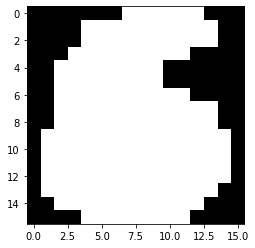

In [19]:
Isig = np.zeros(len(pixel_std))
Isig[lis_sig] = 1
Isig = reshape(Isig,(16,16))

plt.imshow(Isig,cmap='gray')
plt.show()

In [20]:
x_train = x_train_shuffle[:, lis_sig]
x_train = np.hstack((np.ones((N_train, 1)),x_train))
x_test = x_test_shuffle[:, lis_sig]
x_test = np.hstack((np.ones((N_test, 1)),x_test))

x_train.shape
x_test.shape

(875, 174)

In [21]:
w, Niter = regression_logistique(x_train,class_train,Nitermax = 13, eps_conv = 1e-3)

y = 1/(1+np.exp(-x_test.dot(w)))
y_test_pred = np.where(y > 0.5, 1, 0)
w.shape

(174,)

In [22]:
erreur = sum(abs(y_test_pred-class_test))/N_test
print(erreur)

0.07885714285714286


### Visualisation of the error

In [23]:
# ON récupère les indexs des images mal classifiées
lis_err = np.where(abs(y_test_pred-class_test) ==1)[0]
lis_err[0].shape

#On récupère la valeur de leur feature, leur classe, leur proba, la prédiction associé 
x_test_mc = x_test[lis_err, 1:]
class_test_mc = class_test[lis_err]
prob_value_mc = y[lis_err]
pred_mc = y_test_pred[lis_err]

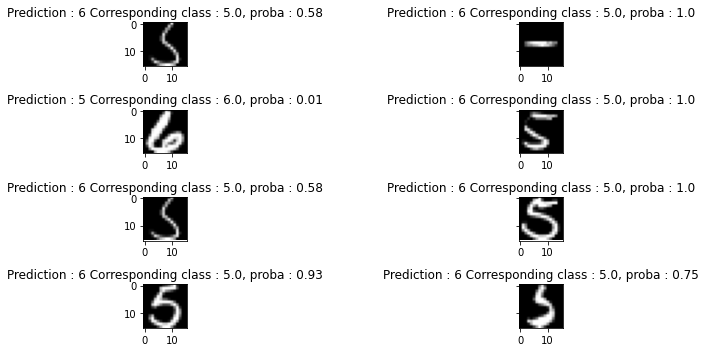

In [24]:
fig, axes = plt.subplots(4, 2, figsize=(15, 5), sharey=True)

for i in range(4):
    for j in range(2):
        # on sélectionne une image aléatoire parmi les image mals classés
        image = random.randint(x_test_mc.shape[0])
        #on créer une image noire
        rev_image = -np.ones((256, 1))
        # on sélection les features de l'image mal classifié qui ont servi à l'entrainement 
        s_pixel = x_test_mc[image, :]
        # on superpose ces features à l'images noires pour reconstitués une image
        rev_image[lis_sig] = s_pixel[:, newaxis]
        rev_image = reshape(rev_image,(16,16))
        
        # affichage
        axes[i][j].imshow(rev_image,cmap='gray')
        axes[i][j].set_title(f'Prediction : {pred_mc[image]+5} Corresponding class : {class_test_mc[image]+5}, proba : {prob_value_mc[image].round(2)}')

plt.tight_layout()
plt.show()

Idée : on peut voir si la frontière de décision doit être à 0.5 ou si une autre frontière améliore la performance du model. Also, one could have a look on FN, FP to understand if the model is doing over fitting. 

One can notice that often misclassified figures, the important part to determine 
Souvent, pour déterminer s'il s'agit d'un 5 ou d'un 6, l'information importante qu'utilise notre cerveau est de regarder si la queue du 5 est fermé ou non. Or, cette information se trouve en général dans la partie gauche de l'image.


Je vais essayer une autre approche qui consiste réduire le nombre de pixel observé en ne conservant que les 2/3 de pixel situé les plus à gauche de l'image. Je vais donc supprimer les 4 dernières colonnes de pixels ainsi que la première qui n'est en général pas significatives. Je conserve ainsi 11 x 16 = 160 pixels. Voyons ce que l'on obtient. 

Pour pouvoir comparer il vaudrait mieux comparer l'image reconstitué avec l'image de base pour voir si ces images mal classifiés le sont à cause d'une perte importante d'informations.

In [25]:
On peut également jouer sur le seuil de 0.5 pour les pixels significatifs.

SyntaxError: invalid syntax (<ipython-input-25-aee1ae3d2f7e>, line 1)

In [ ]:
print(10*16)

## 2nd method :  keep leftwards pixels

In [ ]:
col = np.arange(1,13)
left_pix = [_ for _ in np.arange(256) if _ % 16 in col]
x_train1 = x_train_shuffle[:, left_pix]
x_train1 = np.hstack((np.ones((N_train, 1)),x_train1))
x_test1 = x_test_shuffle[:, left_pix]
x_test1 = np.hstack((np.ones((N_test, 1)),x_test1))

In [ ]:
w1, Niter1 = regression_logistique(x_train1,class_train,Nitermax = 13, eps_conv = 1e-3)

y1 = 1/(1+np.exp(-x_test1.dot(w1)))
y_test_pred1 = np.where(y1 > 0.5, 1, 0)
w1.shape

In [ ]:
erreur1 = sum(abs(y_test_pred1-class_test))/N_test
print(erreur1)

### Visualisation of the error

In [ ]:
lis_err = np.where(abs(y_test_pred1-class_test) ==1)[0]
lis_err[0].shape

x_test1_mc = x_test1[lis_err, 1:]
class_test1_mc = class_test[lis_err]
prob_value1_mc = y1[lis_err]
pred1_mc = y_test_pred1[lis_err]

In [ ]:
fig, axes = plt.subplots(4, 2, figsize=(15, 5), sharey=True)

for i in range(4):
    for j in range(2):
        image = random.randint(x_test1_mc.shape[0])
        rev_image = -np.ones((256, 1))
        s_pixel = x_test1_mc[image, :]
        rev_image[left_pix] = s_pixel[:, newaxis]
        rev_image = reshape(rev_image,(16,16))

        axes[i][j].imshow(rev_image,cmap='gray')
        axes[i][j].set_title(f'Prediction : {pred1_mc[image]+5} Corresponding class : {class_test1_mc[image]+5}, proba : {prob_value1_mc[image].round(2)}')

plt.tight_layout()
plt.show()

In [ ]:
x_train_full = np.hstack((np.ones((N_train, 1)),x_train_shuffle[:,:-1]))
x_test_full = np.hstack((np.ones((N_test, 1)),x_test_shuffle[:,:-1]))
print(x_train_full.shape, x_test_full.shape)

In [ ]:
w_full, Niter_full = regression_logistique(x_train_full,class_train,Nitermax = 13, eps_conv = 1e-3)

y_full = 1/(1+np.exp(-x_test_full.dot(w_full)))
y_test_pred_full = np.where(y_full > 0.5, 1, 0)
w_full.shape

Je vais m'arrêter ici je comprends donc mieux pourquoi on fait cette sélection initialement.

### Change significant value

In [ ]:
pixel_std = np.std(x_train_shuffle[:, :-1], axis = 0)
lis_sig_bis = np.where(pixel_std > 0.6)[0]
print(lis_sig_bis, len(lis_sig_bis))

In [ ]:
Isig = np.zeros(len(pixel_std))
Isig[lis_sig_bis] = 1
Isig = reshape(Isig,(16,16))

plt.imshow(Isig,cmap='gray')
plt.show()

In [ ]:
x_train_bis = x_train_shuffle[:, lis_sig_bis]
x_train_bis = np.hstack((np.ones((N_train, 1)),x_train_bis))
x_test_bis = x_test_shuffle[:, lis_sig_bis]
x_test_bis = np.hstack((np.ones((N_test, 1)),x_test_bis))

x_train_bis.shape
x_test_bis.shape

In [ ]:
w_bis, Niter_bis = regression_logistique(x_train_bis,class_train,Nitermax = 13, eps_conv = 1e-3)

y_bis = 1/(1+np.exp(-x_test_bis.dot(w_bis)))
y_test_pred_bis = np.where(y_bis > 0.5, 1, 0)
w_bis.shape

In [ ]:
erreur_bis = sum(abs(y_test_pred_bis-class_test))/N_test
print(erreur1)

### 1. 

In [ ]:
print(np.min(I), np.max(I))

### 2. 

## 3. Logistic regression using `scikit-learn`

1. **Go to** http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html for a presentation of the logistic regression model in `scikit-learn`.

2. **Apply** it to the present data set.

3. **Comment** on the use of logistic regression.

*Indication : you may have a look at* 

a) Theory : http://openclassroom.stanford.edu/MainFolder/DocumentPage.php?course=MachineLearning&doc=exercises/ex5/ex5.html

b) Video :  https://kr.coursera.org/lecture/machine-learning/regularized-logistic-regression-cAxpF 

c) Example : http://scikit-learn.org/stable/auto_examples/exercises/plot_digits_classification_exercise.html#sphx-glr-auto-examples-exercises-plot-digits-classification-exercise-py

*for a short presentation of regularized logistic regression.*

In [28]:
# Include your code here
from sklearn.linear_model import LogisticRegression
# ...
#
clf_logistic_regression = LogisticRegression(solver='liblinear').fit(x_train, class_train)

print(f" Prediction : {clf_logistic_regression.predict(x_test)},\nProbabilities : {clf_logistic_regression.predict_proba(x_test)},\n Score : {clf_logistic_regression.score(x_test, class_test)}")




 Prediction : [1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0.
 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1.
 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0.
 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0.
 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1.
 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1.
 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0.
 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0.
 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1.
 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0.
 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 

Commentaires :

I choose the liblinear solver because, it performs well on small dataset and it works well with the default L2 penalty.